In [2]:
#importerar tensorflow och de funktioner jag vill använda
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
#importerar mnist, skalar om för att få v'rden mellan 0 och 1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
#gör om label y från siffer värden 0,4,5,6 etc till 10 dim vectorer [0,0,0,0,1,0,0,0,0,0] = 4
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

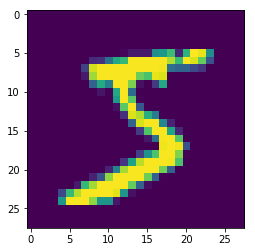

In [5]:
#plotarr input datan
plt.imshow(x_train[0])

Nu ska vi skapa våran model. Vi gör en med 2 hidden layers som har relu funktionen som aktivering. Sista output lagret har en softmax funktion som aktivering och är 10 dimensioner. Detta skapar en vektor som vi tolkar som sannolikheten för varje siffra

In [6]:
inp_lay = Input(shape=(28,28,)) #Input lagret skapas med Input. Våra bilder kommer vara 28,28 stora
flat = Flatten()(inp_lay) # Dense lagren vill ha platta vektorer så detta lager gör om 28,28 bilder till en 784 lång vektor
dense_1 = Dense(units = 500, activation='relu')(flat) #Första hidden layer som är 500 stort. tar föregående lagrets output, flat, som input.
dense_2 = Dense(units = 100, activation='relu')(dense_1) #Andra hidden layer
out = Dense(units = 10, activation='softmax')(dense_2) #output lagret. 

model = Model(inp_lay, out) #Vi skapar våran model med Model kommandot. Specifierar var vi tar in data och var vi tar ut data
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) #Kompilerar modellen. använder adam som optimizer, och crossentropy som loss funktion

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
his = model.fit(x_train, y_train,batch_size=32, epochs=10, validation_data=(x_test,y_test)) #Tränar datan, vi gör 10 epocher alltså vi går igenom dtan 10 ggr

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1991 - accuracy: 0.9401 - val_loss: 0.0947 - val_accuracy: 0.9694
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0806 - accuracy: 0.9749 - val_loss: 0.0707 - val_accuracy: 0.9767
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0560 - accuracy: 0.9818 - val_loss: 0.0964 - val_accuracy: 0.9723
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0786 - val_accuracy: 0.9781
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0807 - val_accuracy: 0.9787
Epoch 7/10
60000/60000 [==============================] 

Nu har vi tränat våran modell. Vi fick ca 99% accuracy på träningsdatan och 98% på test datan. Lite overfitting. Vi kan titta på hur lossen och accuracyn ökade respektive minskade genom  att plotta de kurvorna

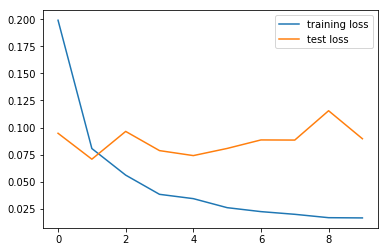

In [10]:
plt.plot(his.history['loss'],label = 'training loss')
plt.plot(his.history['val_loss'], label = 'test loss')
plt.legend()

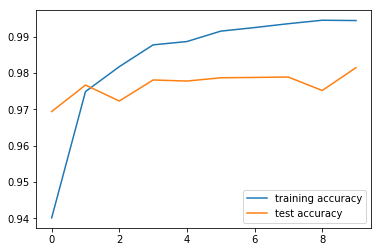

In [12]:
plt.plot(his.history['accuracy'], label = 'training accuracy')
plt.plot(his.history['val_accuracy'], label = 'test accuracy')
plt.legend()

Vi ser att trainig lossen går kontunerligt neråt medans test lossen verkar stagnera fort. Tydligt att vi overfittar. Vi tittar på några bilder och ser vad vi klassifierar de som

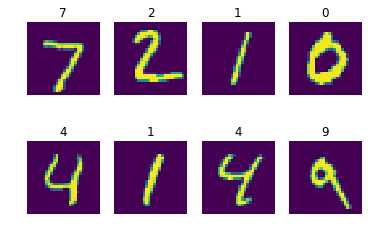

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=4)
count = 0
for rows in ax:
    for col in rows:
        col.imshow(x_test[count])
        col.axis('off')
        pred = np.argmax(model.predict(x_test[count:count+1]))
        col.set_title(pred)
        count+=1


Nedan är ett exempel på en bild som klassifieras fel, vi kan titta på outputen och ser att fyran får en 70% sannolikhet att vara en nia.

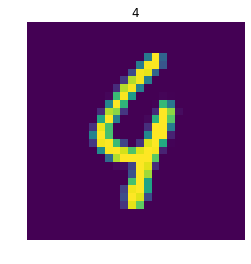

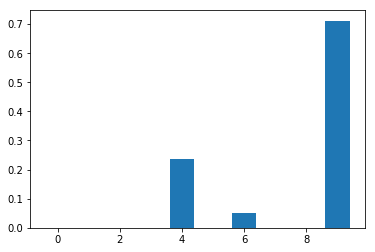

In [17]:
nr = 115
plt.imshow(x_test[nr])
plt.title(np.argmax(y_test[nr]))
plt.axis('off')
pred = model.predict(x_test[nr:nr+1])[0]
plt.figure()
plt.bar(x = np.arange(0,10,1), height = pred)
plt.show()

In [15]:
pred = model.predict(x_test[0:200])
vP = np.argsort(np.var(pred, axis = 1))
vP

array([149, 115, 151,  92, 175, 125,  65, 171,  93, 104,   7, 189, 193,
        96, 177,  20,  78, 191,  62,  21,  40,  74, 119, 121,  18,  95,
       167,   8,  81, 195,   9, 178,   2, 176, 159,  89, 111,  59, 126,
        90, 160,  73, 184,  39, 135, 196,  24,   5, 180,  43,   4,  31,
       114,  46, 118, 143, 137,  57, 154,  97,  77,  98,  14,  37, 106,
        26, 187,  49,  63,  41, 190, 122, 173,  86, 120,  58, 112,  79,
       109, 105, 130,  38, 199, 158, 182,  53, 142,  66,  35, 168,  16,
       185,  15,  36, 108, 107, 150, 131,  12, 146,  33, 198,  72, 123,
        29, 144, 145,  84, 139,  61, 102,  64,   3,  44,  99,  80,  32,
        34, 174,  42, 172,  45, 170, 169,  47,  48, 166, 165, 164, 163,
       162, 161,  50,  30,  28, 110, 179, 197,   1,   6, 194,  10, 192,
        11,  13,  51,  17,  19, 186,  22,  23, 183,  25, 181,  27, 188,
        52, 157, 156, 132,  82,  83, 129, 128, 127,  85,  87, 124,  88,
        91,  94, 100, 101, 103, 117, 116, 133, 134, 136,  76, 15

In [49]:
model.save('parameters.h5')